### MNIST 숫자

In [23]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 각 픽셀 255값이 최대값이어서 0~1 사이의 값으로 조정(일종의 MinMaxScaler)
X_train, X_test = X_train / 255.0, X_test / 255.0

In [24]:
# one-hot-encoding 수행해야 한다
# 그런데 loss 함수를 sparse_categorical_crossentropy로 설정하면 같은 효과

In [25]:
# Flatten: input shape대로 데이터를 잘 펼쳐줌
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

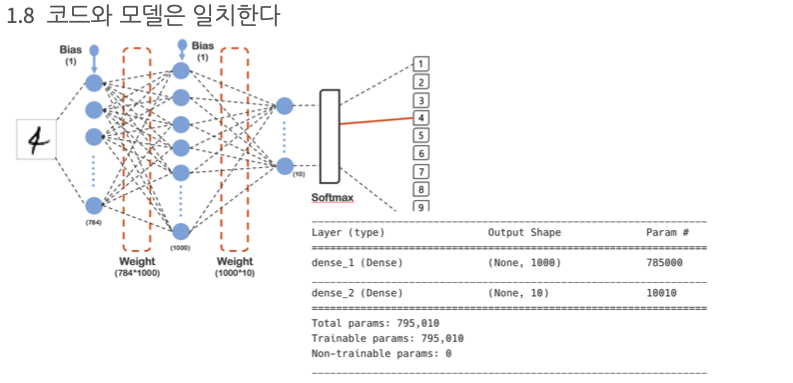

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [27]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs=10, batch_size=100, verbose=1)

print('Fit time :', time.time() - start_time)

Epoch 1/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3903 - accuracy: 0.8853 - val_loss: 0.1091 - val_accuracy: 0.9671
Epoch 2/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0922 - accuracy: 0.9747 - val_loss: 0.0824 - val_accuracy: 0.9744
Epoch 3/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.0804 - val_accuracy: 0.9745
Epoch 4/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0340 - accuracy: 0.9907 - val_loss: 0.0669 - val_accuracy: 0.9799
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0249 - accuracy: 0.9927 - val_loss: 0.0597 - val_accuracy: 0.9813
Epoch 6/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0166 - accuracy: 0.9952 - val_loss: 0.0685 - val_accuracy: 0.9797
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0125 - accuracy: 0.9967 - val_loss: 0.0760 - val_accuracy: 0.9784
Epoch 

### 학습 상황 관찰

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

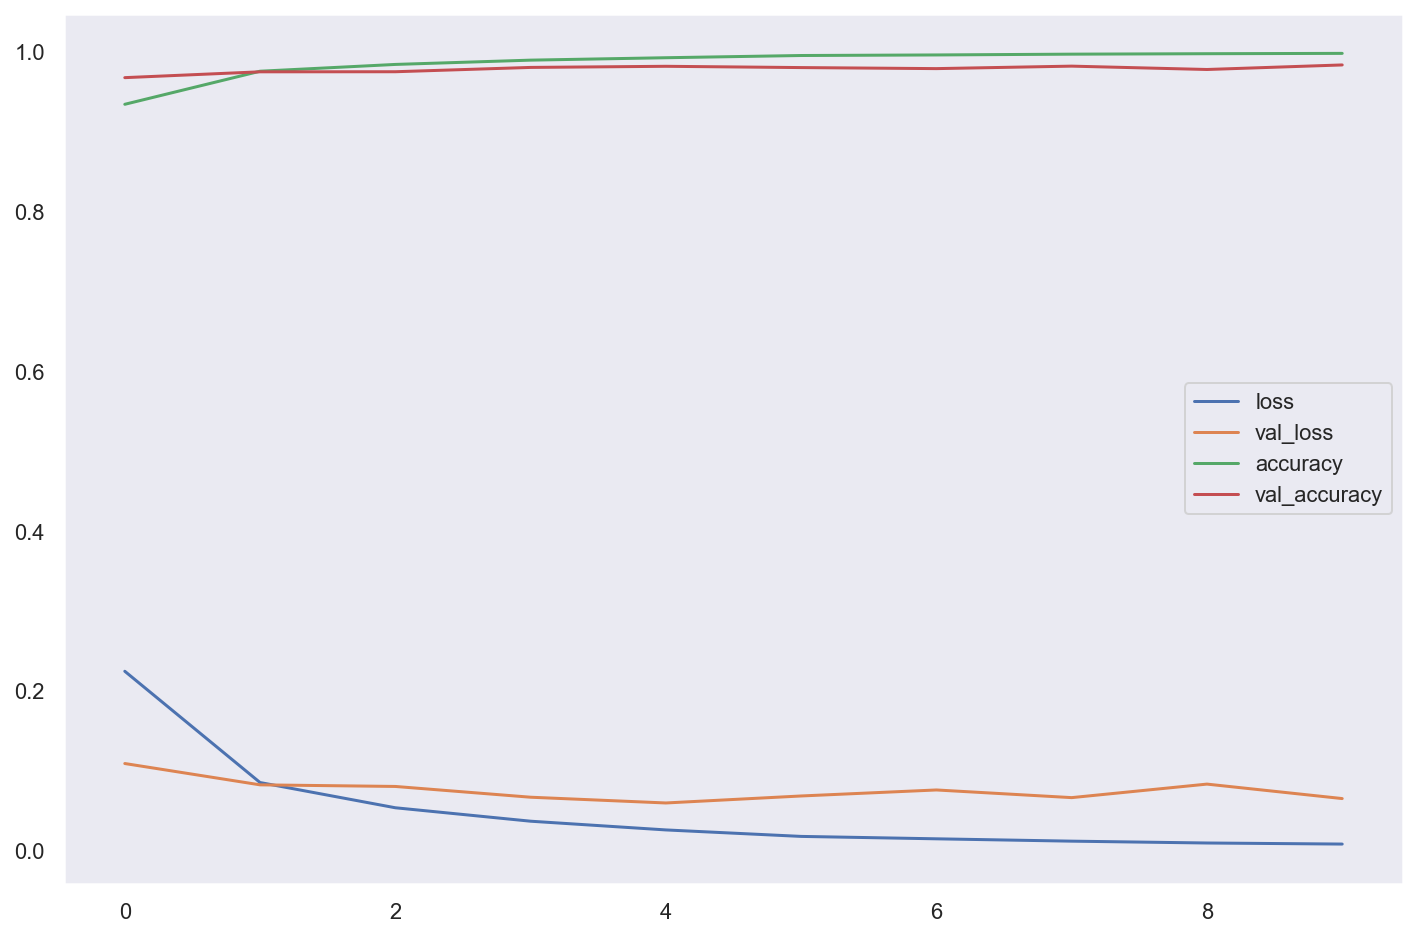

In [31]:
plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

In [32]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0652 - accuracy: 0.9830
Test loss : 0.06521608680486679
Test accuracy : 0.9829999804496765


틀린 데이터 확인

In [35]:
import numpy as np

predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [36]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [37]:
wrong_result = []

for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

len(wrong_result)

170

In [38]:
import random

samples = random.choices(population=wrong_result, k=16)
samples

[2953,
 2135,
 6847,
 947,
 4639,
 6783,
 5936,
 9009,
 1328,
 1226,
 115,
 2648,
 4176,
 8094,
 4065,
 3601]

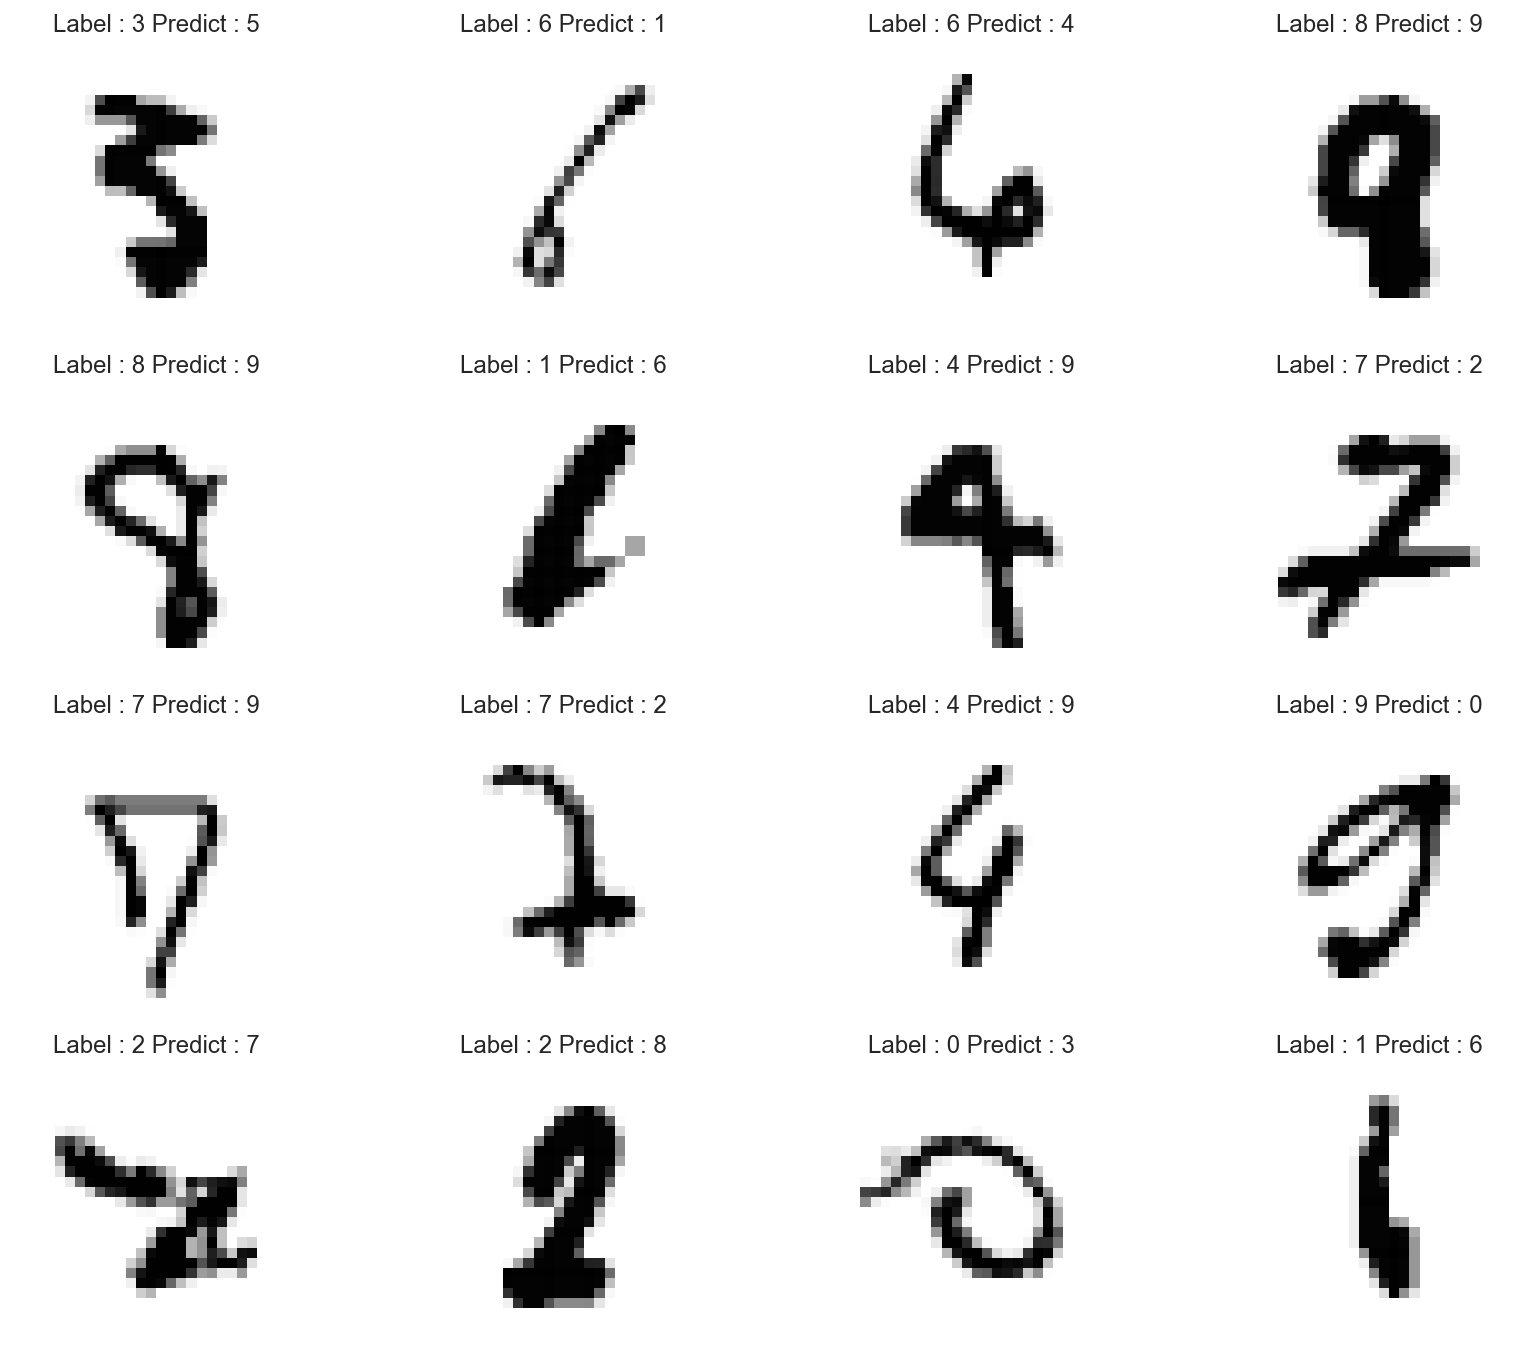

In [43]:
plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()

### MNIST Fashion

In [44]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


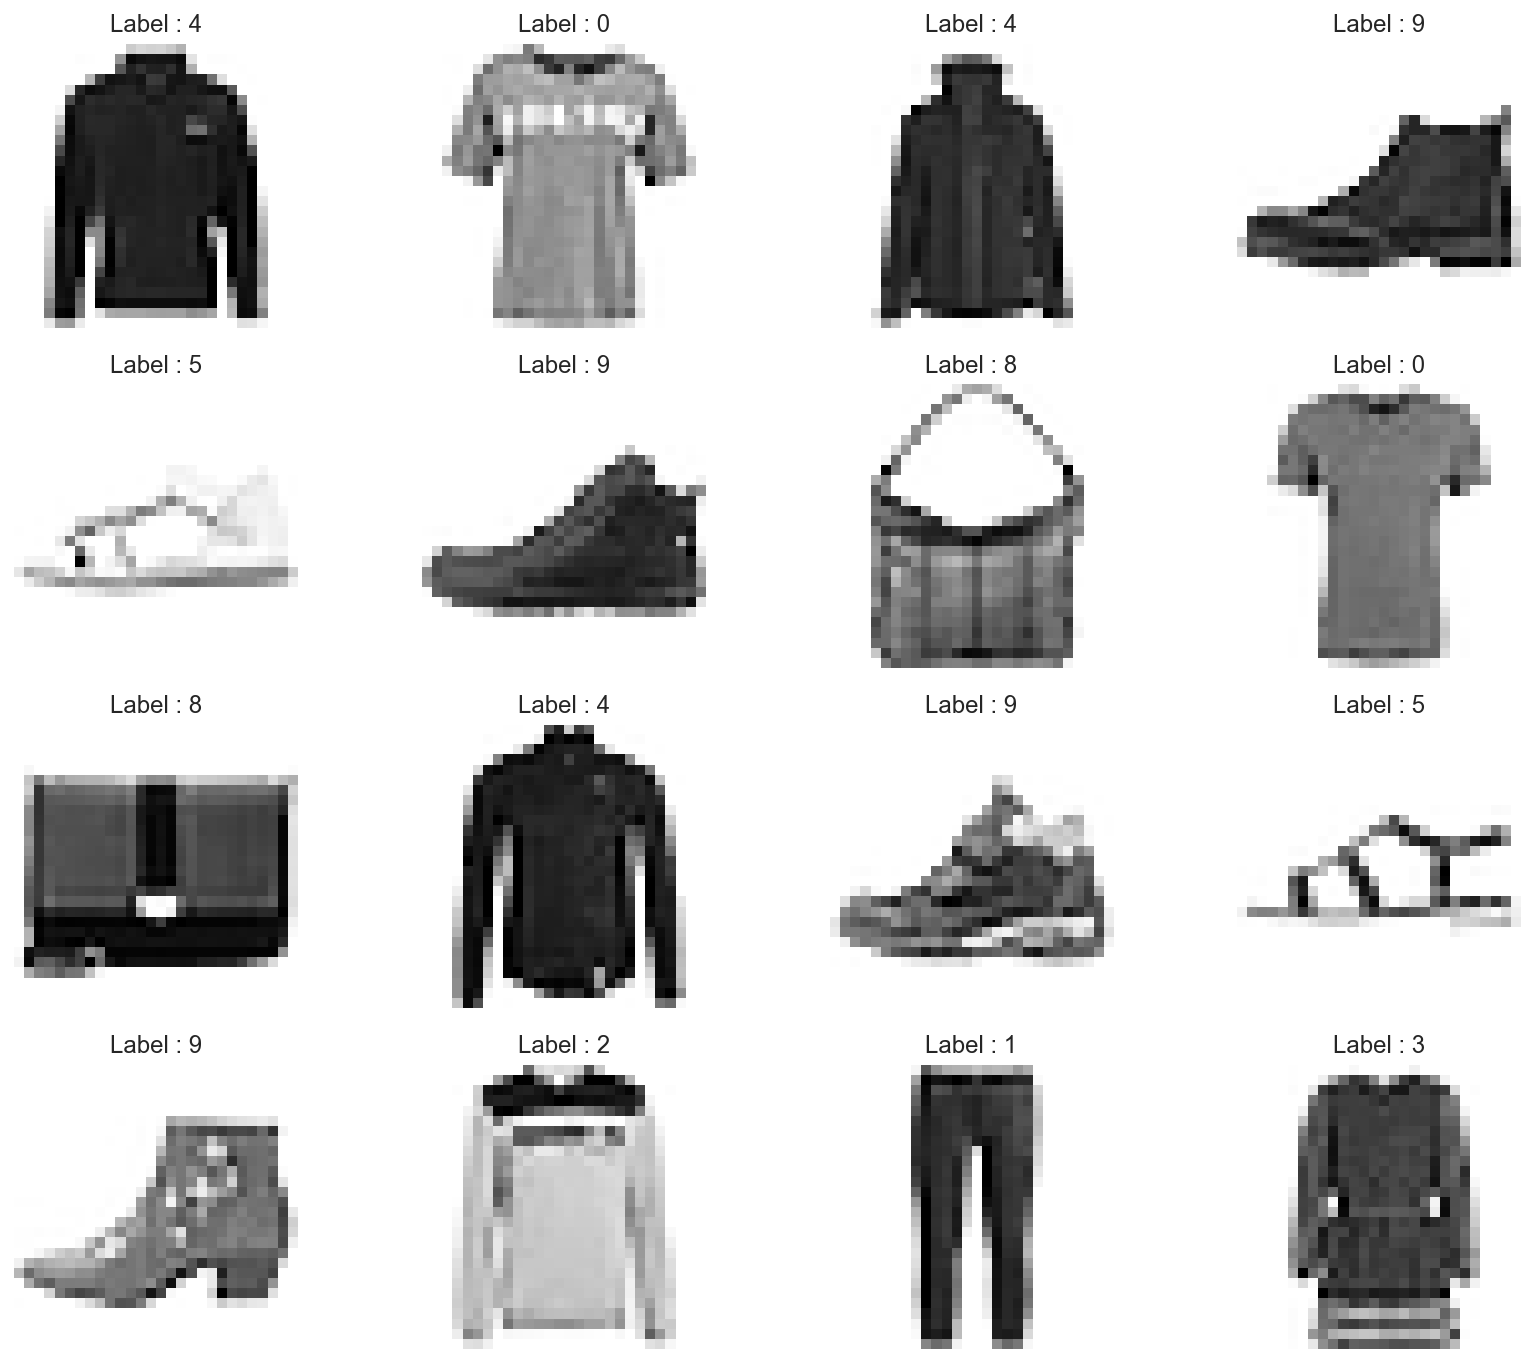

In [46]:
# 데이터 확인
samples = random.choices(population=range(0, len(y_train)), k=16)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_train[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_train[n]))
    plt.axis('off')

plt.show()

In [47]:
# 숫자와 동일한 모델 적용
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


In [53]:
import time

start_time = time.time()
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                epochs=20, batch_size=100, verbose=1)

print('Fit time :', time.time() - start_time)

Epoch 1/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1077 - accuracy: 0.9597 - val_loss: 0.4309 - val_accuracy: 0.8888
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.1046 - accuracy: 0.9604 - val_loss: 0.3808 - val_accuracy: 0.8954
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0989 - accuracy: 0.9625 - val_loss: 0.4119 - val_accuracy: 0.8910
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0977 - accuracy: 0.9628 - val_loss: 0.4082 - val_accuracy: 0.8925
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0963 - accuracy: 0.9642 - val_loss: 0.4160 - val_accuracy: 0.8904
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0908 - accuracy: 0.9659 - val_loss: 0.4050 - val_accuracy: 0.8956
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0937 - accuracy: 0.9651 - val_loss: 0.4160 - val_accuracy: 0.8940
Epoch 

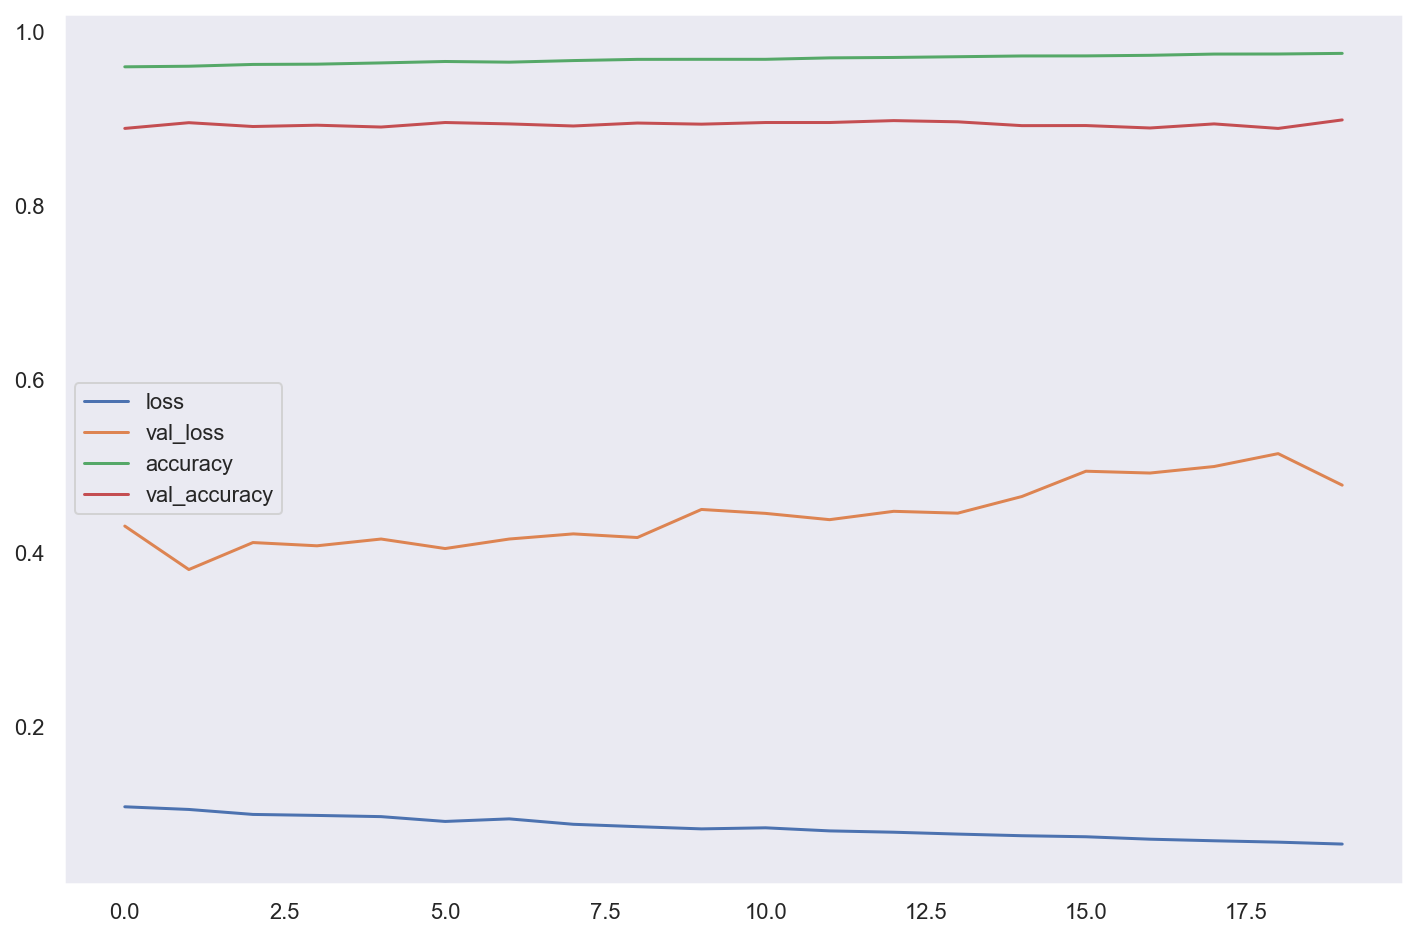

In [54]:
# 학습 상황 관찰

plot_target = ['loss', 'val_loss', 'accuracy', 'val_accuracy']

plt.figure(figsize=(12,8))

for each in plot_target:
    plt.plot(hist.history[each], label=each)
    
plt.legend()
plt.grid()
plt.show()

- 잘 학습이 되는 듯 하지만, val_loss와 train loss 사이에 간격이 발생한다

In [55]:
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accracy :', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.4780 - accuracy: 0.8986
Test loss : 0.47799286246299744
Test accracy : 0.8985999822616577


### 틀린 데이터 확인

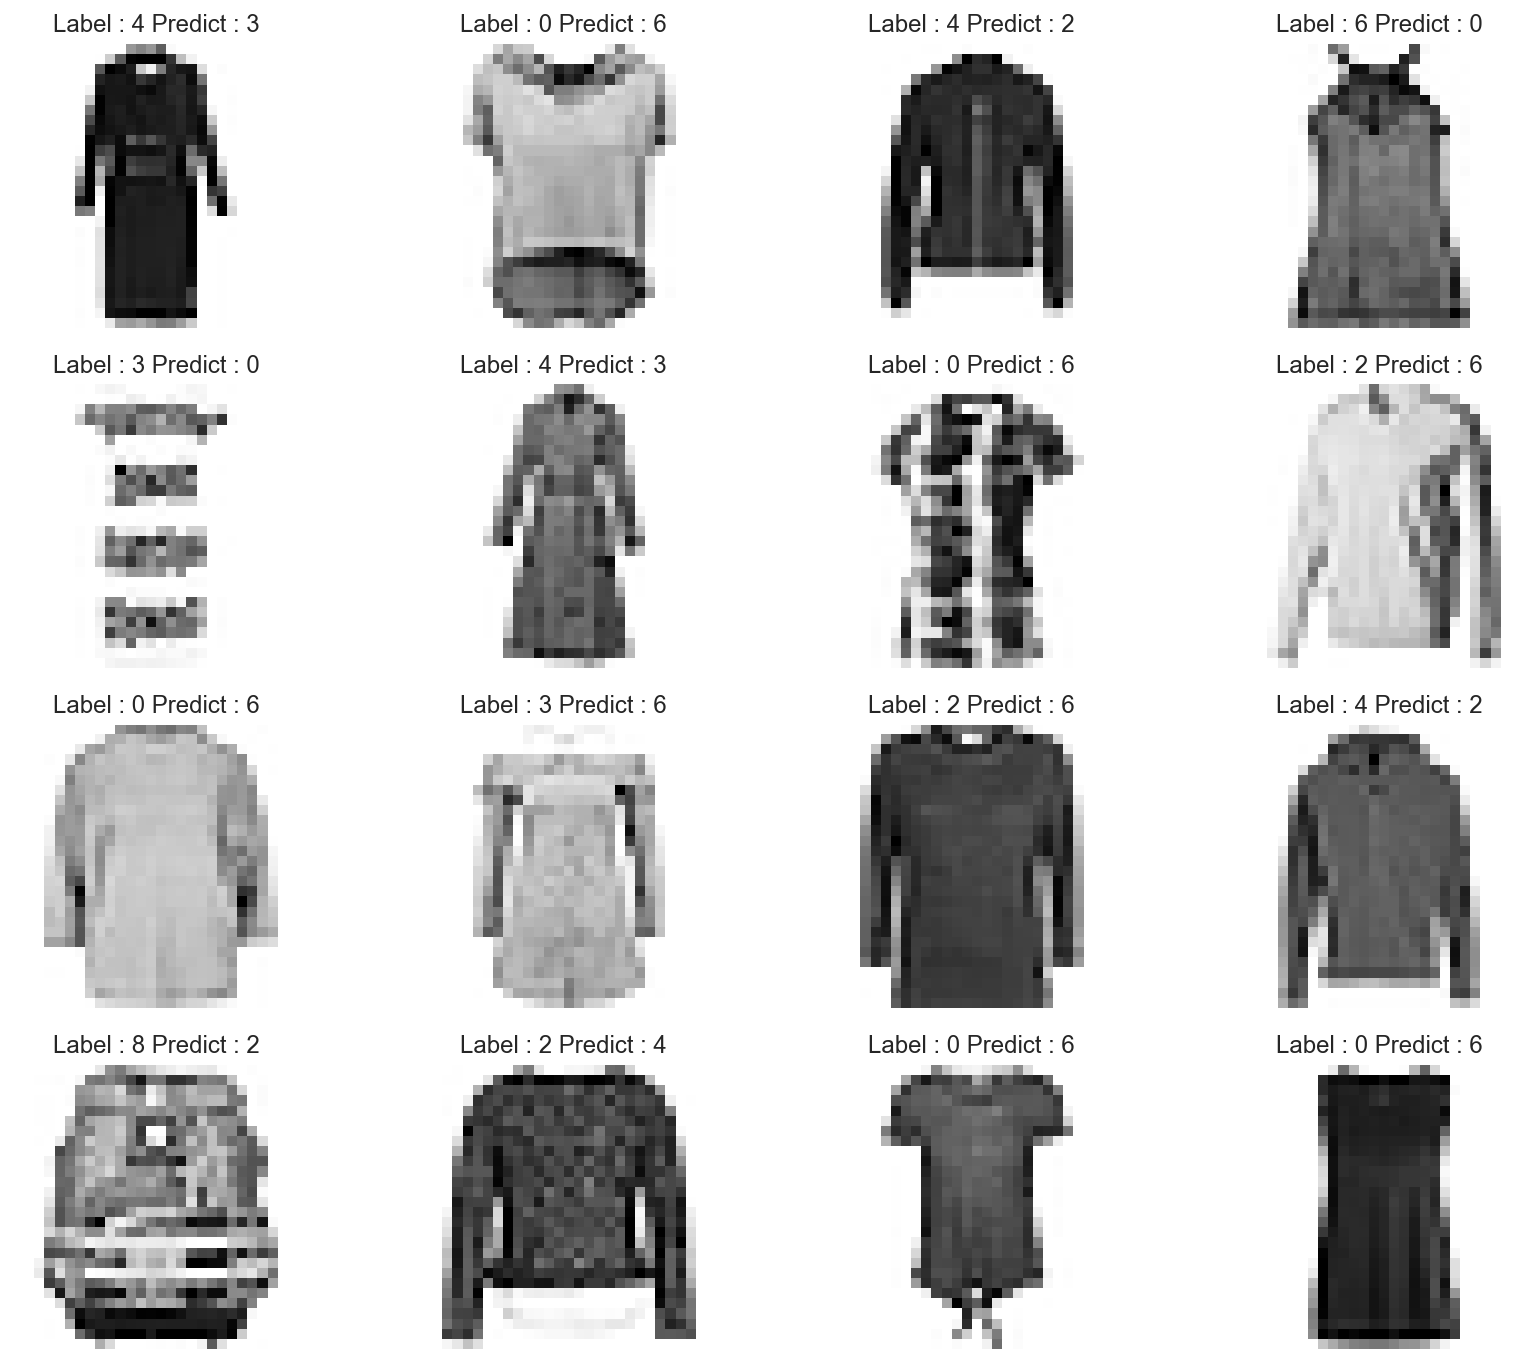

In [56]:
predicted_result = model.predict(X_test)
predicted_labels = np.argmax(predicted_result, axis=1)
predicted_labels[:10]

# 틀린 데이터 인덱스 확인
wrong_result = []
for n in range(0, len(y_test)):
    if predicted_labels[n] != y_test[n]:
        wrong_result.append(n)

# 틀린 데이터에서 샘플 추출
samples = random.choices(population=wrong_result, k=16)

# 그려보기
plt.figure(figsize=(14,12))
for idx, n in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(X_test[n].reshape(28,28), cmap='Greys', interpolation='nearest')
    plt.title('Label : ' + str(y_test[n]) + ' Predict : ' + str(predicted_labels[n]))
    plt.axis('off')

plt.show()